In [1]:
import numpy as np
import pandas as pd
import os

# Get the working directory
directory = "C:\\Users\\lelin\\Desktop\\ADM\\MACHINE LEARNING\\IoT Readings"
os.chdir(directory)

updated_directory = os.getcwd()
print("Updated Working Directory:", updated_directory)
  
raw_data = pd.read_excel('IoTReadings.xlsx')

raw_data.info()

Updated Working Directory: C:\Users\lelin\Desktop\ADM\MACHINE LEARNING\IoT Readings
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7423 entries, 0 to 7422
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             7423 non-null   datetime64[ns]
 1   Timestamp        7423 non-null   float64       
 2   Humidity (%)     7423 non-null   float64       
 3   Temperature (C)  7423 non-null   float64       
 4   dB               7421 non-null   float64       
 5   Âµg/m3 (10)      7404 non-null   float64       
 6   Âµg/m3 (2.5)     7405 non-null   float64       
 7   Âµg/m3 (1.0)     7406 non-null   float64       
 8   No Button        84 non-null     float64       
 9   Yes Button       112 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 580.1 KB


In [2]:
raw_data.head()

,Time,Timestamp,Humidity (%),Temperature (C),dB,Âµg/m3 (10),Âµg/m3 (2.5),Âµg/m3 (1.0),No Button,Yes Button
0,2023-07-10 14:06:27,0.000000,44.5,28.5,193.0,13.0,8.0,46.3,NaN,NaN
1,2023-07-10 14:07:02,0.000405,45.5,28.5,162.0,13.0,8.0,255.0,NaN,NaN
2,2023-07-10 14:07:37,0.000810,44.5,28.5,169.0,13.0,8.0,255.0,NaN,NaN
3,2023-07-10 14:08:12,0.001215,44.5,28.5,178.0,13.0,8.0,255.0,NaN,NaN
4,2023-07-10 14:08:47,0.001620,44.0,28.5,185.0,13.0,8.0,255.0,NaN,NaN


In [3]:
print(raw_data.isna().sum().sort_values()) 

Time                  0
Timestamp             0
Humidity (%)          0
Temperature (C)       0
dB                    2
Âµg/m3 (1.0)         17
Âµg/m3 (2.5)         18
Âµg/m3 (10)          19
Yes Button         7311
No Button          7339
dtype: int64


In [4]:
raw_data

,Time,Timestamp,Humidity (%),Temperature (C),dB,Âµg/m3 (10),Âµg/m3 (2.5),Âµg/m3 (1.0),No Button,Yes Button
0,2023-07-10 14:06:27,0.000000,44.5,28.5,193.0,13.0,8.0,46.3,NaN,NaN
1,2023-07-10 14:07:02,0.000405,45.5,28.5,162.0,13.0,8.0,255.0,NaN,NaN
2,2023-07-10 14:07:37,0.000810,44.5,28.5,169.0,13.0,8.0,255.0,NaN,NaN
3,2023-07-10 14:08:12,0.001215,44.5,28.5,178.0,13.0,8.0,255.0,NaN,NaN
4,2023-07-10 14:08:47,0.001620,44.0,28.5,185.0,13.0,8.0,255.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7418,2023-08-05 16:17:01,26.090671,57.0,23.6,53.3,19.0,10.0,255.0,NaN,NaN
7419,2023-08-05 16:20:06,26.092812,56.5,23.6,53.5,18.0,11.0,255.0,NaN,NaN
7420,2023-08-05 16:23:12,26.094965,56.5,23.6,53.4,19.0,NaN,255.0,NaN,NaN
7421,2023-08-05 16:26:17,26.097106,57.0,23.6,53.4,19.0,NaN,255.0,NaN,NaN


In [5]:
##Preprocessing
#Handling Missing Data
from sklearn.impute import KNNImputer

# Remove the 'Time' column and store it for later
time_column = raw_data.pop('Time')

# Get the numeric columns (excluding "Yes" and "No" buttons)
numeric_columns = raw_data.columns.difference(['Yes Button', 'No Button', 'Timestamp'])

# Perform imputation on numeric columns only
imputer = KNNImputer(n_neighbors=5)
imputed_numeric_data = imputer.fit_transform(raw_data[numeric_columns])
imputed_numeric_df = pd.DataFrame(imputed_numeric_data, columns=numeric_columns)

# Concatenate "Timestamp" column with imputed numeric data
imputed_data = pd.concat([raw_data[['Timestamp']], imputed_numeric_df], axis=1)

# Add "Yes" and "No" columns back to the imputed DataFrame
imputed_data['Yes Button'] = raw_data['Yes Button']
imputed_data['No Button'] = raw_data['No Button']

# Add the 'Time' column back at the end as the first column
imputed_data.insert(0, 'Time', time_column)

imputed_data.head()

,Time,Timestamp,Humidity (%),Temperature (C),dB,Âµg/m3 (1.0),Âµg/m3 (10),Âµg/m3 (2.5),Yes Button,No Button
0,2023-07-10 14:06:27,0.000000,44.5,28.5,193.0,46.3,13.0,8.0,NaN,NaN
1,2023-07-10 14:07:02,0.000405,45.5,28.5,162.0,255.0,13.0,8.0,NaN,NaN
2,2023-07-10 14:07:37,0.000810,44.5,28.5,169.0,255.0,13.0,8.0,NaN,NaN
3,2023-07-10 14:08:12,0.001215,44.5,28.5,178.0,255.0,13.0,8.0,NaN,NaN
4,2023-07-10 14:08:47,0.001620,44.0,28.5,185.0,255.0,13.0,8.0,NaN,NaN


In [6]:
## Reducing Blank Values in "No Button"
import math

# Iterate over the 'No Button' column to perform the checks and replacements
for i in range(1, len(imputed_data)-1):
    # Check if the current row has a blank value in 'No Button' and the next row has a non-blank value
    if pd.isnull(imputed_data.at[i, 'No Button']) and not pd.isnull(imputed_data.at[i + 1, 'No Button']):
        # Calculate the difference in 'Timestamp' values with the previous row
        timestamp_diff_prev = abs(imputed_data.at[i, 'Timestamp'] - imputed_data.at[i + 1, 'Timestamp'])
        # Check if the difference is less than or equal to 0.0208333333
        if timestamp_diff_prev <= 0.0208333333:
            # Take the previous non-blank value, divide it by 2, round it up, and replace both rows
            new_value = math.ceil(imputed_data.at[i + 1, 'No Button'] / 2)
            imputed_data.at[i, 'No Button'] = new_value
            imputed_data.at[i + 1, 'No Button'] = new_value
            
# Iterate over the 'No Button' column to perform the checks and replacements
for i in range(len(imputed_data) - 1, 0, -1):
    # Check if the current row has a blank value in 'No Button' and the next row has a non-blank value
    if pd.isnull(imputed_data.at[i, 'No Button']) and not pd.isnull(imputed_data.at[i - 1, 'No Button']):
        # Calculate the difference in 'Timestamp' values
        timestamp_diff = abs(imputed_data.at[i, 'Timestamp'] - imputed_data.at[i - 1, 'Timestamp'])
        # Check if the difference is less than or equal to 0.0208333333
        if timestamp_diff <= 0.0208333333:
            # Take the non-blank value, divide it by 2, round it up, and replace both rows
            new_value = math.ceil(imputed_data.at[i - 1, 'No Button'] / 2)
            imputed_data.at[i, 'No Button'] = new_value
            imputed_data.at[i - 1, 'No Button'] = new_value      

In [7]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7423 entries, 0 to 7422
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             7423 non-null   datetime64[ns]
 1   Timestamp        7423 non-null   float64       
 2   Humidity (%)     7423 non-null   float64       
 3   Temperature (C)  7423 non-null   float64       
 4   dB               7423 non-null   float64       
 5   Âµg/m3 (1.0)     7423 non-null   float64       
 6   Âµg/m3 (10)      7423 non-null   float64       
 7   Âµg/m3 (2.5)     7423 non-null   float64       
 8   Yes Button       112 non-null    float64       
 9   No Button        176 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 580.1 KB


In [8]:
## Reducing Blank Values in "Yes Button"

# Iterate over the 'Yes Button' column to perform the checks and replacements
for i in range(1, len(imputed_data)-1):
    # Check if the current row has a blank value in 'Yes Button' and the next row has a non-blank value
    if pd.isnull(imputed_data.at[i, 'Yes Button']) and not pd.isnull(imputed_data.at[i + 1, 'Yes Button']):
        # Calculate the difference in 'Timestamp' values with the previous row
        timestamp_diff_prev = abs(imputed_data.at[i, 'Timestamp'] - imputed_data.at[i + 1, 'Timestamp'])
        # Check if the difference is less than or equal to 0.0208333333
        if timestamp_diff_prev <= 0.0208333333:
            # Take the previous non-blank value, divide it by 2, round it up, and replace both rows
            new_value = math.ceil(imputed_data.at[i + 1, 'Yes Button'] / 2)
            imputed_data.at[i, 'Yes Button'] = new_value
            imputed_data.at[i + 1, 'Yes Button'] = new_value
            
# Iterate over the 'Yes Button' column to perform the checks and replacements
for i in range(len(imputed_data) - 1, 0, -1):
    # Check if the current row has a blank value in 'Yes Button' and the next row has a non-blank value
    if pd.isnull(imputed_data.at[i, 'Yes Button']) and not pd.isnull(imputed_data.at[i - 1, 'Yes Button']):
        # Calculate the difference in 'Timestamp' values
        timestamp_diff = abs(imputed_data.at[i, 'Timestamp'] - imputed_data.at[i - 1, 'Timestamp'])
        # Check if the difference is less than or equal to 0.0208333333
        if timestamp_diff <= 0.0208333333:
            # Take the non-blank value, divide it by 2, round it up, and replace both rows
            new_value = math.ceil(imputed_data.at[i - 1, 'Yes Button'] / 2)
            imputed_data.at[i, 'Yes Button'] = new_value
            imputed_data.at[i - 1, 'Yes Button'] = new_value      

In [9]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7423 entries, 0 to 7422
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             7423 non-null   datetime64[ns]
 1   Timestamp        7423 non-null   float64       
 2   Humidity (%)     7423 non-null   float64       
 3   Temperature (C)  7423 non-null   float64       
 4   dB               7423 non-null   float64       
 5   Âµg/m3 (1.0)     7423 non-null   float64       
 6   Âµg/m3 (10)      7423 non-null   float64       
 7   Âµg/m3 (2.5)     7423 non-null   float64       
 8   Yes Button       270 non-null    float64       
 9   No Button        176 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 580.1 KB


In [10]:
imputed_data.head()

,Time,Timestamp,Humidity (%),Temperature (C),dB,Âµg/m3 (1.0),Âµg/m3 (10),Âµg/m3 (2.5),Yes Button,No Button
0,2023-07-10 14:06:27,0.000000,44.5,28.5,193.0,46.3,13.0,8.0,NaN,NaN
1,2023-07-10 14:07:02,0.000405,45.5,28.5,162.0,255.0,13.0,8.0,NaN,NaN
2,2023-07-10 14:07:37,0.000810,44.5,28.5,169.0,255.0,13.0,8.0,NaN,NaN
3,2023-07-10 14:08:12,0.001215,44.5,28.5,178.0,255.0,13.0,8.0,NaN,NaN
4,2023-07-10 14:08:47,0.001620,44.0,28.5,185.0,255.0,13.0,8.0,NaN,NaN


In [11]:
# Create a function to calculate Comfort Index
def calculate_comfort_index(row):
    if pd.notnull(row['Yes Button']) and pd.isnull(row['No Button']):
        return 1
    elif pd.notnull(row['No Button']) and pd.isnull(row['Yes Button']):
        return 0
    elif pd.notnull(row['Yes Button']) and pd.notnull(row['No Button']):
        return row['Yes Button'] / (row['Yes Button'] + row['No Button'])
    else:
        return None

# Apply the function to each row
imputed_data['Comfort Index'] = imputed_data.apply(calculate_comfort_index, axis=1)

In [93]:
imputed_data
imputed_data.to_excel('imputed_data.xlsx', index=False)  # This will export the DataFrame without including the index

In [13]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7423 entries, 0 to 7422
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             7423 non-null   datetime64[ns]
 1   Timestamp        7423 non-null   float64       
 2   Humidity (%)     7423 non-null   float64       
 3   Temperature (C)  7423 non-null   float64       
 4   dB               7423 non-null   float64       
 5   Âµg/m3 (1.0)     7423 non-null   float64       
 6   Âµg/m3 (10)      7423 non-null   float64       
 7   Âµg/m3 (2.5)     7423 non-null   float64       
 8   Yes Button       270 non-null    float64       
 9   No Button        176 non-null    float64       
 10  Comfort Index    357 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 638.0 KB


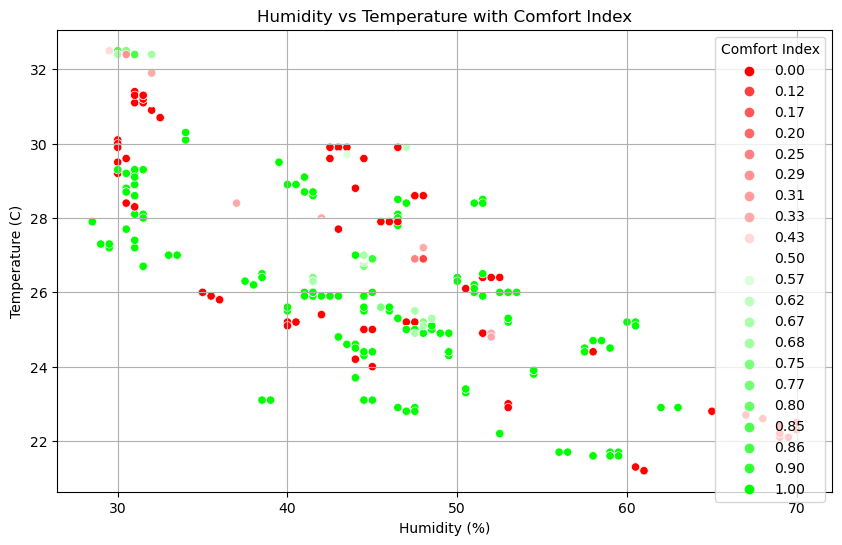

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FuncFormatter

# Define custom colormap
colors = [(1, 0, 0), (1, 1, 1), (0, 1, 0)]  # Red, White, Green
cmap_name = 'custom_color_map'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=imputed_data, x='Humidity (%)', y='Temperature (C)', hue='Comfort Index', legend='full', palette=cm)
plt.title('Humidity vs Temperature with Comfort Index')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (C)')
plt.grid(True)

# Format the legend labels to round to two decimal places
formatter = FuncFormatter(lambda x, _: '{:.2f}'.format(x))
legend = plt.gca().get_legend()
legend.set_title('Comfort Index')
for label in legend.get_texts():
    label.set_text(formatter(float(label.get_text())))

plt.show()

Linear Regression: Negative Mean Squared Error = -0.17568305062773568
Decision Tree Regressor: Negative Mean Squared Error = -0.1569410674222678
Random Forest Regressor: Negative Mean Squared Error = -0.08444389027866306
Gradient Boosting Regressor: Negative Mean Squared Error = -0.10709395366538271
KNN Regressor: Negative Mean Squared Error = -0.10894697011577875
Support Vector Regressor: Negative Mean Squared Error = -0.1366993051380376


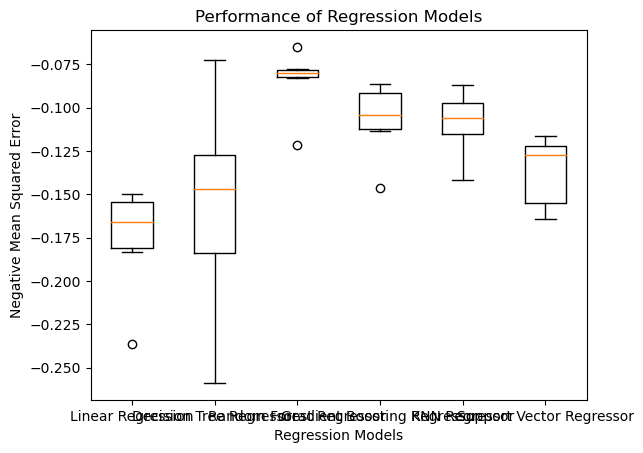

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Drop 'Time' column and any rows with missing values in the target variable 'Comfort Index'
final_model = imputed_data.drop(columns=['Yes Button', 'No Button', 'Time', 'Timestamp']).dropna(subset=['Comfort Index'])

# Filter out rows with missing values in the input features
final_model = final_model.dropna()

# Define input features (X) and target variable (y)
X = final_model.drop(columns=['Comfort Index'])
y = final_model['Comfort Index']

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()
}

results = []

# Iterate over models
for model_name, model in models.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    results.append(cv_results)
    
    # Print results for each model
    print(f"{model_name}: Negative Mean Squared Error = {np.mean(cv_results)}")

# Plot results
plt.boxplot(results, labels=models.keys())
plt.xlabel('Regression Models')
plt.ylabel('Negative Mean Squared Error')
plt.title('Performance of Regression Models')
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score

# Iterate over models
for model_name, model in models.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    # Convert NMSE to MSE
    cv_results = -cv_results
    # Calculate additional metrics
    mae_scores = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    # Print results for each model
    print(f"Model: {model_name}")
    print(f"Negative Mean Squared Error (NMSE): {np.mean(cv_results)}")
    print(f"Mean Absolute Error (MAE): {np.mean(mae_scores)}")
    print(f"R-squared (R^2): {np.mean(r2_scores)}")
    print("\n")

Model: Linear Regression
Negative Mean Squared Error (NMSE): 0.17568305062773568
Mean Absolute Error (MAE): 0.35803671531489906
R-squared (R^2): -0.010611699529072963


Model: Decision Tree Regressor
Negative Mean Squared Error (NMSE): 0.14559568728959046
Mean Absolute Error (MAE): 0.2084628968052881
R-squared (R^2): 0.07670026574252325


Model: Random Forest Regressor
Negative Mean Squared Error (NMSE): 0.082522821052955
Mean Absolute Error (MAE): 0.21779745989018054
R-squared (R^2): 0.5265889310878603


Model: Gradient Boosting Regressor
Negative Mean Squared Error (NMSE): 0.10634273464772485
Mean Absolute Error (MAE): 0.2559633047703341
R-squared (R^2): 0.3765981229352667


Model: KNN Regressor
Negative Mean Squared Error (NMSE): 0.10894697011577875
Mean Absolute Error (MAE): 0.24982155693815775
R-squared (R^2): 0.3715930716113586


Model: Support Vector Regressor
Negative Mean Squared Error (NMSE): 0.1366993051380376
Mean Absolute Error (MAE): 0.2755233929820288
R-squared (R^2): 0.

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2, 3, 4],
}

# Initialize Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best Negative Mean Squared Error: -0.10675224664690657


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize RandomForestRegressor with best parameters
best_random_forest = RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=300, random_state=42)

# Fit the model to the entire training data
best_random_forest.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_random_forest.predict(X_test)

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error on the test set
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared on the test set
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 0.0740180301403758
Mean Absolute Error (MAE): 0.19353280802664863
R-squared (R^2): 0.5813938547640598


Feature Importances:
Temperature (C): 0.3362109901446544
Humidity (%): 0.25772186212733716
dB: 0.15116198795495875
Âµg/m3 (10): 0.13012656891993038
Âµg/m3 (2.5): 0.09785177219327298
Âµg/m3 (1.0): 0.026926818659846325


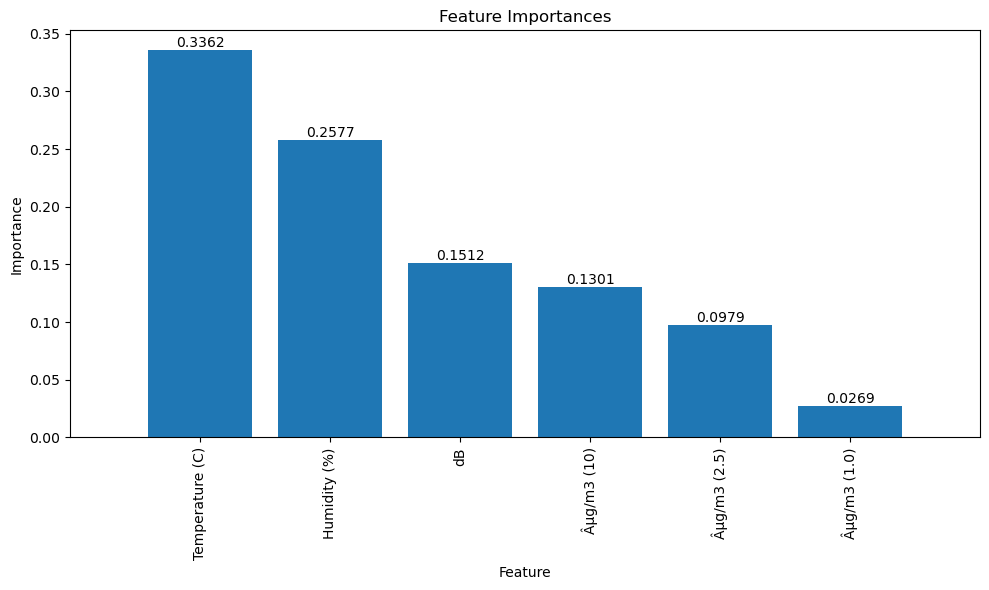

In [47]:
import matplotlib.pyplot as plt

# Get feature importances
importances = best_random_forest.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importances in descending order
print("Feature Importances:")
for i in range(len(indices)):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
bars = plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()

# Add tags
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 4), ha='center', va='bottom')

plt.show()

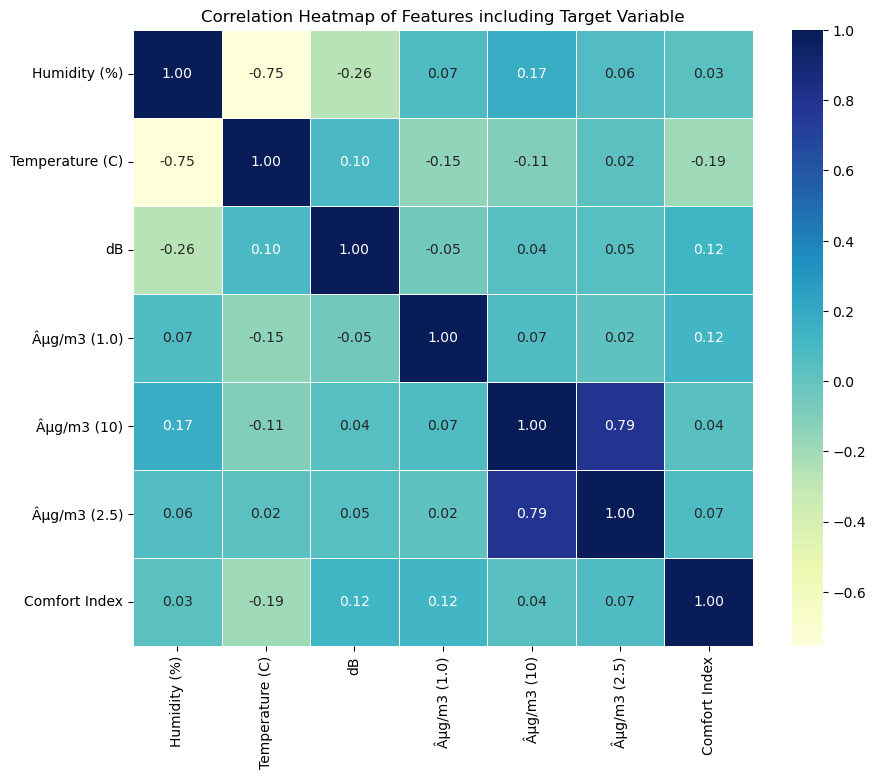

In [46]:
import seaborn as sns

# Concatenate the target variable with the feature matrix
X_with_target = pd.concat([X, y], axis=1)

# Calculate Pearson correlation matrix
correlation_matrix = final_model.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features including Target Variable')
plt.show()

In [75]:
# Define ranges of values for each feature
temperature_values = np.linspace(20, 40, num=40)
humidity_values = np.linspace(30, 70, num=20)
db_values = np.linspace(40, 200, num=20)  # Define range for db values
ug_per_m3_10_values = np.linspace(0, 40, num=10)  # Define range for ug_per_m3_10 values

mode_ug_per_m3_2_5 = 5
mode_ug_per_m3_1_0 = 255
# Define range for other features if needed

# Initialize variables to store optimal feature values and best comfort index
optimal_temperature = None
optimal_humidity = None
optimal_db_value = None
optimal_ug_per_m3_10_value = None
# Initialize variables for other features if needed

best_comfort_index = float('-inf')

# Iterate over each combination of feature values
for temperature in temperature_values:
    for humidity in humidity_values:
        for db_value in db_values:
            for ug_per_m3_10_value in ug_per_m3_10_values:
                # Create test data with current feature values
                test_data = np.array([[temperature, humidity, db_value, ug_per_m3_10_value, mode_ug_per_m3_2_5, mode_ug_per_m3_1_0]])
                
                # Predict the comfort index using the trained model
                comfort_index = best_random_forest.predict(test_data.reshape(1, -1))
                
                # Update optimal feature values and best comfort index if a higher comfort index is found
                if comfort_index > best_comfort_index:
                    best_comfort_index = comfort_index
                    optimal_temperature = temperature
                    optimal_humidity = humidity
                    optimal_db_value = db_value
                    optimal_ug_per_m3_10_value = ug_per_m3_10_value
                    # Update optimal values for other features as well if needed

# Print the optimal feature values and best comfort index
print("Optimal Temperature:", optimal_temperature)
print("Optimal Humidity:", optimal_humidity)
print("Optimal dB Value:", optimal_db_value)
print("Optimal ug/m3 (10) Value:", optimal_ug_per_m3_10_value)
# Print optimal values for other features if needed
print("Best Comfort Index:", best_comfort_index)

Optimal Temperature: 20.0
Optimal Humidity: 30.0
Optimal dB Value: 40.0
Optimal ug/m3 (10) Value: 0.0
Best Comfort Index: [0.45735356]


In [91]:
# Specify the feature values for the specific combination
specific_temperature = 20
specific_humidity = 30
specific_db_value = 40
specific_ug_per_m3_10_value = 0

# Create a test data array with the specific feature values
specific_test_data = np.array([[specific_temperature, specific_humidity, specific_db_value, specific_ug_per_m3_10_value, mode_ug_per_m3_2_5, mode_ug_per_m3_1_0]])

# Predict the comfort index using the trained model
specific_comfort_index = best_random_forest.predict(specific_test_data.reshape(1, -1))

# Print the resulting comfort index
print("Comfort Index for the specific combination of feature values:", specific_comfort_index[0])

Comfort Index for the specific combination of feature values: 0.4573535631035632
